In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#EJECUTAMOS NOTEBOOK DE PANDAS MISSING EXTENSION

In [2]:
%run '/content/pandas_missing_extension.ipynb'

# CARGAMOS NUESTRO DATASET

In [14]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [15]:
df.missing.number_missing()

869

# ANALIZANDO POR VARIABLES FALTANTES(COLUMNAS)

In [16]:
df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,survived,0,891,0.000000
1,pclass,0,891,0.000000
2,sex,0,891,0.000000
3,age,177,891,19.865320
4,sibsp,0,891,0.000000
5,parch,0,891,0.000000
6,fare,0,891,0.000000
7,embarked,2,891,0.224467
8,class,0,891,0.000000
9,who,0,891,0.000000


In [17]:
df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,11,73.333333
1,2,2,13.333333
2,177,1,6.666667
3,688,1,6.666667


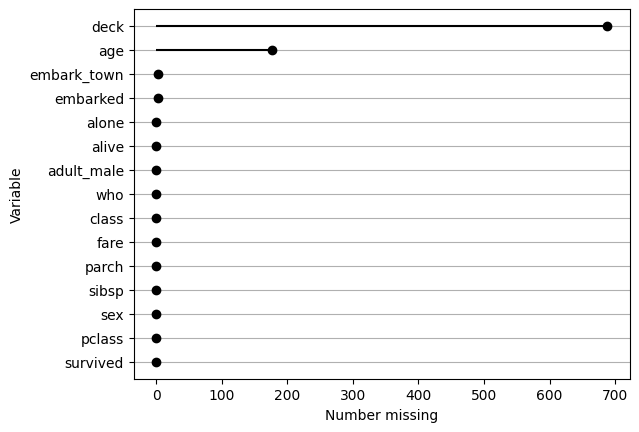

In [18]:
df.missing.missing_variable_plot()

In [9]:
import missingno

<Axes: >

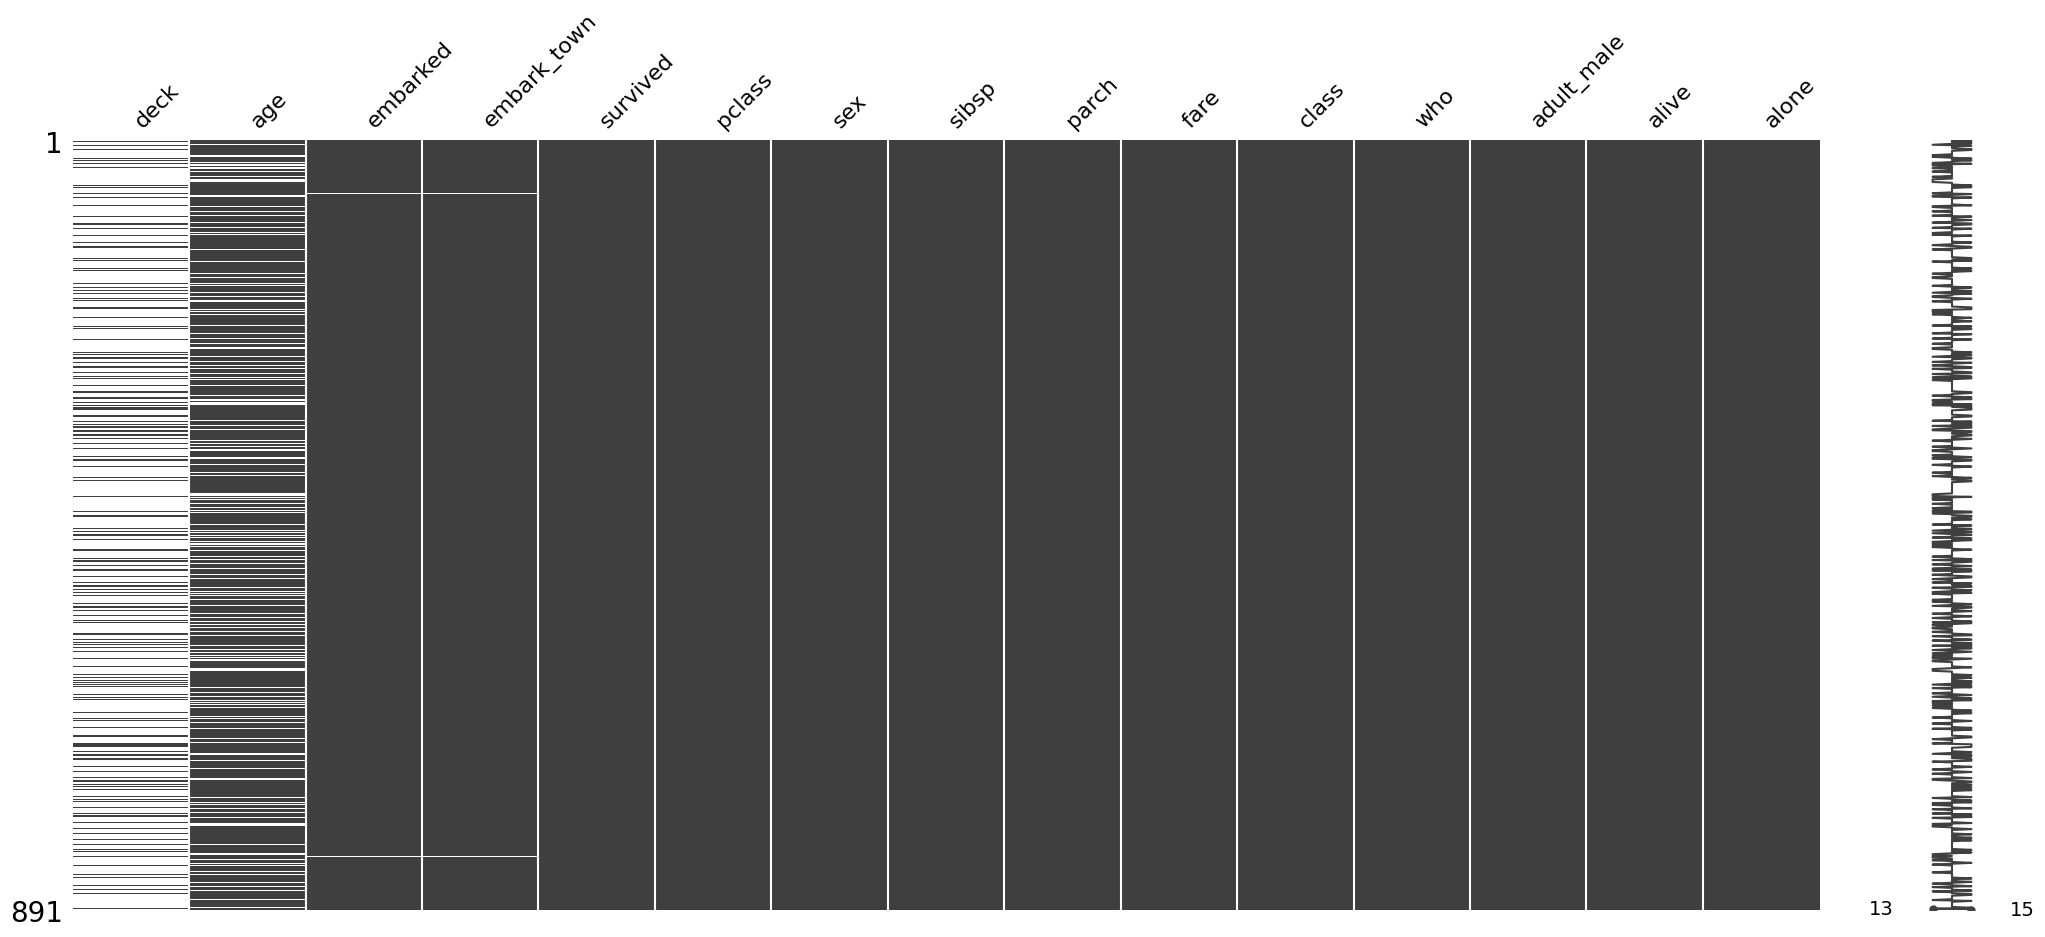

In [19]:
(
    df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

#IMPUTACIÓN DE LA EDAD

In [25]:
round(df.age.mean())

30

In [26]:
df_age_mean = df.copy()

In [27]:
df_age_mean['age'] = df_age_mean['age'].fillna(df_age_mean['age'].mean())
sorted_age_df = df_age_mean.sort_values(
    by=['age'],
    ascending=False
)
sorted_age_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.00,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.00,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
96,0,1,male,71.00,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
493,0,1,male,71.00,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
116,0,3,male,70.50,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False


In [28]:
print(f" mediana original : {df['age'].mean()} | mediana sin nulos : {df_age_mean['age'].mean()}")

 mediana original : 29.69911764705882 | mediana sin nulos : 29.69911764705882


In [29]:
df_age_ffill = df.copy()

In [30]:
df_age_ffill['age'] = df_age_ffill['age'].ffill()
sorted_age_ffill = df_age_ffill.sort_values(
    by=['age'],
    ascending=False
)
sorted_age_ffill

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.00,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.00,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
493,0,1,male,71.00,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
96,0,1,male,71.00,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.50,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
470,0,3,male,0.75,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False


In [31]:
print(f" mediana original : {df['age'].mean()} | mediana sin nulos : {df_age_ffill['age'].mean()}")

 mediana original : 29.69911764705882 | mediana sin nulos : 29.581560044893376


In [32]:
df_age_bfill = df.copy()

In [33]:
df_age_bfill['age'] = df_age_bfill['age'].bfill()
sorted_age_bfill = df_age_bfill.sort_values(
    by=['age'],
    ascending=False
)
sorted_age_bfill

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.00,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
629,0,3,male,80.00,0,0,7.7333,Q,Third,man,True,NaN,Queenstown,no,True
851,0,3,male,74.00,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
493,0,1,male,71.00,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
96,0,1,male,71.00,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,0,3,male,0.75,0,0,7.7250,Q,Third,man,True,NaN,Queenstown,no,True
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False


In [34]:
print(f" mediana original : {df['age'].mean()} | mediana sin nulos : {df_age_bfill['age'].mean()}")

 mediana original : 29.69911764705882 | mediana sin nulos : 29.87056116722783


In [35]:
df_age_interpolate = df.copy()

In [36]:
df_age_interpolate['age'] = df_age_interpolate['age'].interpolate()
sorted_age_interpolate = df_age_interpolate.sort_values(
    by=['age'],
    ascending=False
)
sorted_age_interpolate

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.00,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.00,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
493,0,1,male,71.00,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
96,0,1,male,71.00,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.50,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False


In [37]:
print(f" mediana original : {df['age'].mean()} | mediana sin nulos : {df_age_interpolate['age'].mean()}")

 mediana original : 29.69911764705882 | mediana sin nulos : 29.726060606060603


#GRAFICAMOS LA IMPUTACIÓN

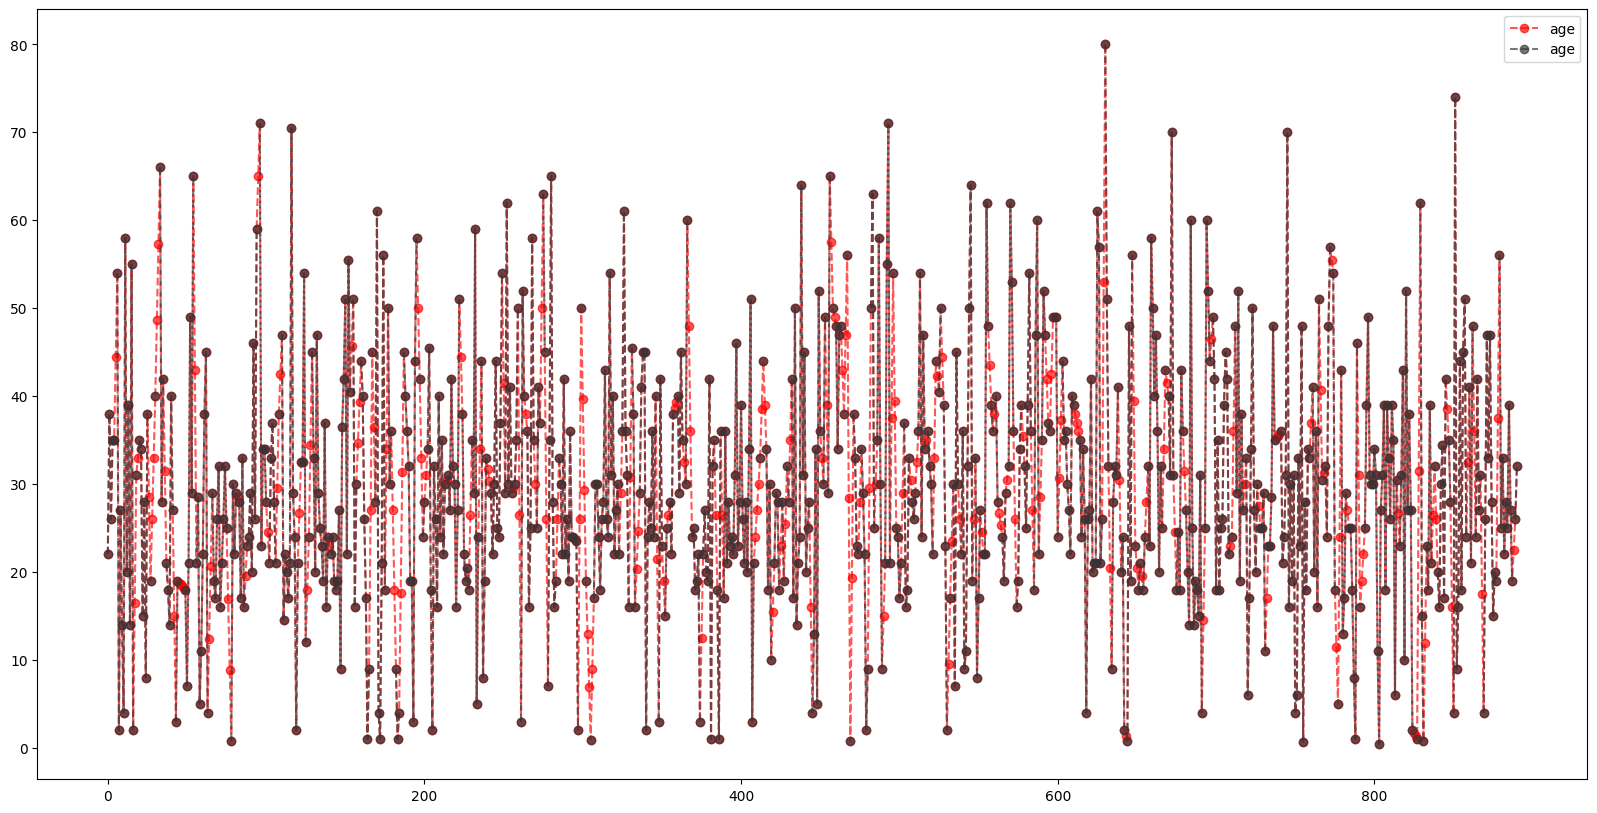

In [40]:

plt.figure(figsize=(20,10))
df['age'].interpolate().plot(color='red',marker='o',alpha=6/9,linestyle='dashed')
df['age'].plot(color='#313638',marker='o',alpha=6/9,linestyle='dashed')
plt.legend()
plt.show()
